# Udacity Data Analyst Nanodegree <br>Project: Analyze A/B Test Results 
### By: Amanda Hanway, 12/10/2023

#### Table of Contents:
- [Introduction](#Introduction)
- [Part I - Probability](#Part-I---Probability)
- [Part II - A/B Test](#Part-II---A/B-Test)
- [Part III - Regression](#Part-III---Regression)
- [Conclusions](#Conclusions)

---
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

---
## Part I - Probability

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.  
  
  
**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# read the data to a dataframe
df = pd.read_csv("ab_data.csv")

# view some rows of data
display(df.head())

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# number of rows in dataset
total_rows = df.shape[0]
print('----------> Total rows =', total_rows)

----------> Total rows = 294478


**c.** The number of unique users in the dataset.

In [4]:
# unique users
unique_users = len(pd.unique(df['user_id']))
print('----------> Unique users =', unique_users)

----------> Unique users = 290584


**d.** The proportion of users converted.

In [5]:
# proportion of users converted
converted_users = df['converted'].value_counts(normalize=True)
print(converted_users)
converted_users = converted_users[1]
print()
print("----------> Proportion of users converted was", converted_users)

converted
0    0.880341
1    0.119659
Name: proportion, dtype: float64

----------> Proportion of users converted was 0.11965919355605512


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# number of times when the "group" is `treatment` but "landing_page" is not a `new_page`
treatment_not_new_page = df[(df['group']=='treatment') & (df['landing_page'] != 'new_page')].count()['user_id']
print('----------> Rows where group is treatment and landing_page not new_page =', treatment_not_new_page)

----------> Rows where group is treatment and landing_page not new_page = 1965


**f.** Do any of the rows have missing values?

In [7]:
# number of rows with missing values
missing = df.isnull().any(axis=1).sum()
print("----------> rows with missing values =", missing)

----------> rows with missing values = 0


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
# inaccurate = rows where group is treatment and landing_page is not new_page
#  or rows where group is control and landing_page is not old_page
df2 = df[~((df['group']=='treatment') & (df['landing_page'] != 'new_page'))]
df2 = df2[~((df2['group']=='control') & (df2['landing_page'] != 'old_page'))]

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
# unique users
unique_users = len(pd.unique(df2['user_id']))
print("----------> Unique users =", unique_users)

----------> Unique users = 290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# duplicate user_id
duplicate_user_id = df2[df2['user_id'].duplicated()]
duplicate_user_id

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [12]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id 
df2 = df2.drop(2893)

# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [14]:
converted_users = df2['converted'].value_counts(normalize=True)
print(converted_users)
converted_users = converted_users[1]
print()
print("----------> Probability of users converted was", converted_users)

converted
0    0.880403
1    0.119597
Name: proportion, dtype: float64

----------> Probability of users converted was 0.11959708724499628


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
converted_users = df2.groupby('group')['converted'].mean()
display(converted_users)
print()
print("----------> Probability of control group users converted was", converted_users[0])

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64


----------> Probability of control group users converted was 0.1203863045004612


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
print("----------> Probability of treatment group users converted was", converted_users[1])

----------> Probability of treatment group users converted was 0.11880806551510564


In [17]:
# The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = converted_users[1] - converted_users[0] 
print('----------> actual difference = ', obs_diff)

----------> actual difference =  -0.0015782389853555567


**d.** What is the probability that an individual received the new page?

In [18]:
new_page_users = df2.landing_page.value_counts()[0]/len(df.index)
print("----------> Probability of new_page was", new_page_users)

----------> Probability of new_page was 0.4934494257635545


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

**Answer:**   
    - The treatment group did not lead to more conversions.  
    - The probabily of the converted control group users was slightly higher than that of the treatment group.  

        - The overall probability of users converted was 0.1196
        - The probability of treatment group users converted was 0.1188
        - The probability of control group users converted was 0.1204


<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

**>>>>>>>> Answer:**  
- Null hypotheses (**$H_0$**): The new page is not better than the old page.
- Alternative hypotheses (**$H_1$**): The new page is better for conversions.

<br>
<br>


### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
# p_new = p_old = p_population
# Overall probability of users converted was 0.11959708724499628
converted_users = df2['converted'].value_counts(normalize=True)
print(converted_users)
converted_users = converted_users[1]
print()
p_new = converted_users
print("----------> p_new = ", p_new)

converted
0    0.880403
1    0.119597
Name: proportion, dtype: float64

----------> p_new =  0.11959708724499628


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
# p_new = p_old = p_population
# Overall probability of users converted was 0.11959708724499628
p_old = p_new
print("----------> p_old = ", p_old)

----------> p_old =  0.11959708724499628


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [21]:
page_users = df2['landing_page'].value_counts()
print(page_users)

new_page_users = page_users[0]
print()
print("----------> # individuals in treatment group (shown new_page) was", new_page_users)

landing_page
new_page    145310
old_page    145274
Name: count, dtype: int64

----------> # individuals in treatment group (shown new_page) was 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
old_page_users = page_users[1]
print()
print("----------> # individuals in control group (shown old_page) was", old_page_users)


----------> # individuals in control group (shown old_page) was 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [23]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(2, size = new_page_users, p=[p_new,1 - p_new])
print(new_page_converted)
print(new_page_converted.mean())


[1 1 1 ... 0 1 1]
0.8811988163237217


**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice(2, size=old_page_users, p=[p_old,1 - p_old])
print(old_page_converted)
print(old_page_converted.mean())

[1 1 1 ... 1 0 1]
0.8815342043311261


**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
converted_prob = new_page_converted.mean() - old_page_converted.mean()
print('----------> Converted probability =', converted_prob)

----------> Converted probability = -0.00033538800740440244



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(2, size = new_page_users)

# Simulate a Sample for the control Group
old_page_converted = np.random.choice(2, size = old_page_users)

# Sampling distribution 
p_diffs = []
sample_new_props = []
sample_old_props = []
for _ in range(10000):
    sample_new = np.random.choice(2, size=new_page_users, p=[p_new,1 - p_new])
    sample_new_mean = sample_new.mean()
    sample_new_props.append(sample_new_mean)
    
    sample_old = np.random.choice(2, size=old_page_users, p=[p_old,1 - p_old])
    sample_old_mean = sample_old.mean()
    sample_old_props.append(sample_old_mean)   
    
    p_diffs.append(sample_new_mean - sample_old_mean)     


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


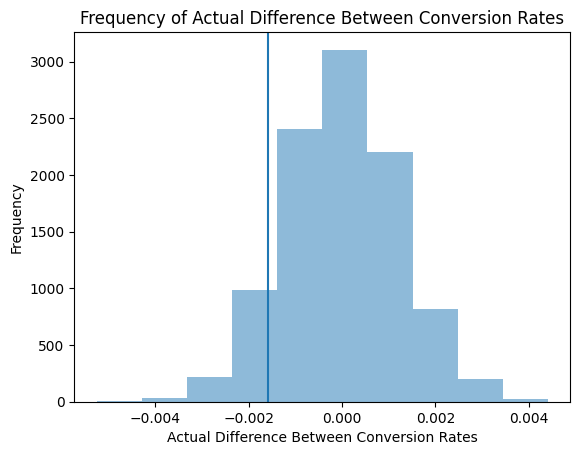

In [27]:
plt.hist(p_diffs, alpha=.5)
plt.axvline(obs_diff)
plt.title("Frequency of Actual Difference Between Conversion Rates")
plt.xlabel("Actual Difference Between Conversion Rates")
plt.ylabel("Frequency")
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
(p_diffs > obs_diff).mean()

0.9056

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

**>>>>>>>>>> Answer:**
 - The value calculated in part j was the p-value.
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 
 - The p-value of 0.903 signifies that you would expect to see test statistic as extreme as the one calculated by the test 90% of the time. Given the p-value exceeds the Type 1 error rate of 0.05, the null hypothesis cannot be rejected and the new page does not perform better than the old page.
<br>     



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [29]:
import statsmodels.api as sm

converted = df2[df2['converted'] == 1]

print("Converted:")
page_converted = converted.groupby('group')['converted'].count()
display(page_converted)

# number of conversions with the old_page
convert_old = page_converted[0]

# number of conversions with the new_page
convert_new = page_converted[1]

print('----------> # of conversions with the old_page =' , convert_old)
print('----------> # of conversions with the new_page =', convert_new)

user_counts = df2.groupby('group')['user_id'].count()
print("\nUser Counts:")
display(user_counts)

# number of individuals who were shown the old_page
n_old = user_counts[0]

# number of individuals who received new_page
n_new = user_counts[1]

print('----------> Users shown old page =' , n_old)
print('----------> Users shown new page =', n_new)

Converted:


group
control      17489
treatment    17264
Name: converted, dtype: int64

----------> # of conversions with the old_page = 17489
----------> # of conversions with the new_page = 17264

User Counts:


group
control      145274
treatment    145310
Name: user_id, dtype: int64

----------> Users shown old page = 145274
----------> Users shown new page = 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [30]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
# proportions_ztest(count_array, nobs_array, alternative='larger'):
#    count_array = represents the number of "converted" for each group
#    nobs_array = represents the total number of observations (rows) in each group
#    alternative = choose one of the values from [‘two-sided’, ‘smaller’, ‘larger’] depending upon two-tailed, left-tailed, or right-tailed respectively
#type(convert_old)
#type(convert_old.item())
#type(n_old)

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print("Z-score", z_score)
print("P-value", p_value)

Z-score -1.3109241984234394
P-value 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

**>>>>>>>>>>>>>>>>>>> Answer:**
- The z-score of -1.31 indicates a value that is 1.31 standard deviations below the mean of the data.
- The p-value of 0.90 means that you would expect to see test statistic as extreme as the one calculated by the test 90% of the time. 
- The z-score and p-value agree with the findings in j and k. Given the p-value exceeds the Type 1 error rate of 0.05, the null hypothesis cannot be rejected and the new page does not perform better than the old page.

---
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**>>>>>>>>>>>> Answer:**  
- Logistic regression because it will estimate the probability of the conversion occurring vs not occurring.

<br>

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [31]:
df2['intercept'] = 1
df2['ab_page'] = np.where(df2['group']=='treatment',1,0)

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [32]:
# defining the dependent and independent variables 
Xtrain = df2[['intercept', 'ab_page']]
ytrain = df2['converted']
   
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:               8.077e-06
Time:                        20:10:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?   
**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


**>>>>>>>>>>>>>>>> Answer:**
- The P-value associated with the ab_page was 0.190.
- Given the p-value exceeds the Type 1 error rate of 0.05, the null hypothesis cannot be rejected and the new page does not perform better than the old page.
- This value differs from the value in Part II of 0.90 because in Part II, the instruction stated to assume the converted probabilities were equal (p_new = p_old = p_population = 0.11959708724499628). In this section, the model calculated the probabilities. The Part II tests were one-tailed, meaning it is only interested in the relationship in one direction regardless of a relationship in the other direction. This test was two-tailed, meaning it tested for the possibility of a relationship in either direction.
<br>
<br>

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**>>>>>>>>>>>>>>>>>>> Answer:**
- It is a good idea to consider other factors in the regression model because the page shown may not have been the reason the user converted. 
- Another factor that may have come into play is time of day, such as in a case where the user was just browsing the site but did not have time to make a purchase.
- Disadvantages of adding more independent variables to the model are the increased chance of overfitting the data, and longer processing times.  


<br>
<br>

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [34]:
# Read the countries.csv
df_c = pd.read_csv("countries.csv")

# view some rows of data
display(df_c.head())

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [35]:
# Join with the df2 dataframe
df_merged = df2.merge(df_c, how='left', on='user_id')
display(df_merged.head())

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [36]:
# Create the necessary dummy variables
d_var = pd.get_dummies(df_merged['country'], dtype=int)
print(d_var.head())

# Join with the df_merged
df_merged = pd.concat([df_merged, d_var], axis=1)
display(df_merged.head())

   CA  UK  US
0   0   0   1
1   0   0   1
2   0   0   1
3   0   0   1
4   0   0   1


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


Part III g) logistic regression model with 2 country variables

In [37]:
# defining the dependent and independent variables 
Xtrain = df_merged[['intercept', 'ab_page', 'US', 'UK']]
ytrain = df_merged['converted']
   
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:               2.323e-05
Time:                        20:10:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

**>>>>>>>>>>>>>>> Written Response:**  

Logistic Regression Using Page and 2 Country Variables:

- The p-value was 0.1760.
- Given the p-value exceeds the Type 1 error rate of 0.05, the null hypothesis cannot be rejected and the country does not impact conversion.
- Practically, unless the product is specific to a country or language, the country does not seem to be a factor in whether the user would purchase or not.
- Similarly for the a/b page, unless the old page was hard to navigate, this does not seem that it would be a factor.


<br>
<br>

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [38]:
# create interactive dummy variables 
df_merged['US_inter'] = df_merged['US'] * df_merged['ab_page']
df_merged['UK_inter'] = df_merged['UK'] * df_merged['ab_page']

In [39]:
# defining the dependent and independent variables 
Xtrain = df_merged[['intercept', 'ab_page', 'US', 'UK', 'US_inter', 'UK_inter']]
ytrain = df_merged['converted']
   
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

log_reg.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:               3.482e-05
Time:                        20:10:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_inter       0.0469      0.054      0.872      0.383      -0.059       0.152
UK_inter       0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

**>>>>>>>>>>>>> Written Response:**  

Logistic Regression Using Page, 2 Country Variables and 2 Interactive Variables:
- The p-value was 0.1920.
- Given the p-value exceeds the Type 1 error rate of 0.05, the null hypothesis cannot be rejected and the country and interactive variables do not impact conversion.
- Practically, unless the product is specific to a country or language, the country does not seem to be a factor in whether the user would purchase or not.
- Similarly for the a/b page, unless the old page was hard to navigate, this does not seem that it would be a factor.

---
## Conclusions

Three logistic regression tests were performed on the data to estimate the probability of the conversion occurring vs not occurring.
1. Base model using independent variables 'intercept' and 'ab_page'
2. Base model plus independent variables 'UK' and 'US'  
3. Base model plus independent variables 'UK', 'US', 'UK_inter' and 'US_inter'  

The results of all three tests indicated the null hypothesis cannot be rejected - the new page is not better than the old page, and the addition of country and interactive variables did not impact conversions.
